In [8]:
import pandas as pd
from pandas_datareader import data
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
pd.core.common.is_list_like = pd.api.types.is_list_like

In [9]:
start = '2019-06-01'
end = '2020-06-01'

df = data.DataReader('^N225', 'yahoo', start, end)

In [11]:
df.head(10)
# volume 出来高・株取引量
# adj close 調整後終値

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-03,20438.029297,20305.740234,20327.869141,20410.880859,67400,20410.880859
2019-06-04,20464.570312,20289.640625,20435.859375,20408.539062,69200,20408.539062
2019-06-05,20800.640625,20646.150391,20667.890625,20776.099609,72300,20776.099609
2019-06-06,20842.279297,20745.839844,20745.839844,20774.039062,59600,20774.039062
2019-06-07,20907.769531,20816.580078,20859.779297,20884.710938,50700,20884.710938
2019-06-10,21166.119141,21077.949219,21095.400391,21134.419922,58200,21134.419922
2019-06-11,21227.179688,21066.619141,21099.539062,21204.279297,52100,21204.279297
2019-06-12,21259.699219,21118.750000,21130.390625,21129.720703,56500,21129.720703
2019-06-13,21111.230469,20932.130859,21040.910156,21032.000000,65700,21032.000000


In [13]:
date = df.index
price = df['Adj Close']

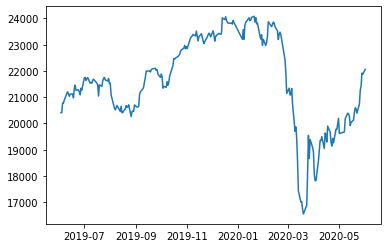

In [14]:
plt.plot(date,price)

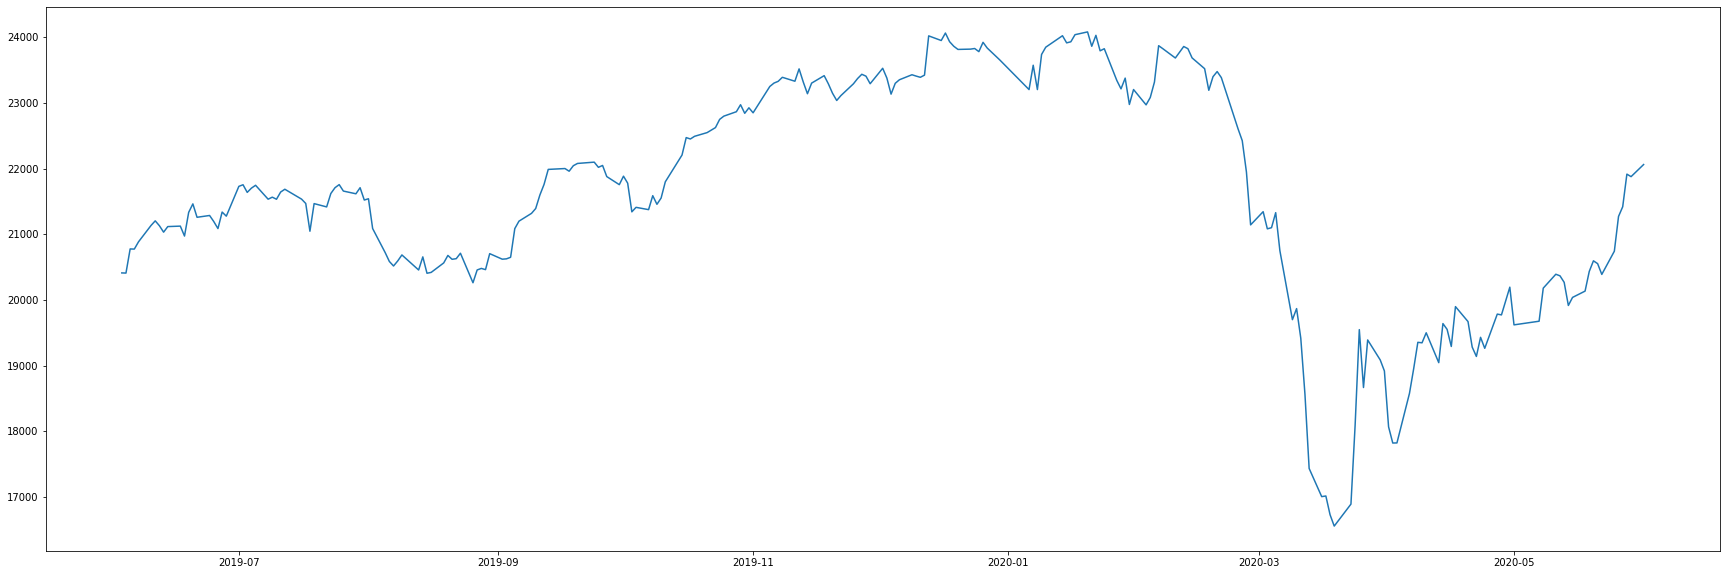

In [16]:
plt.figure(figsize=(30,10))
plt.plot(date,price)

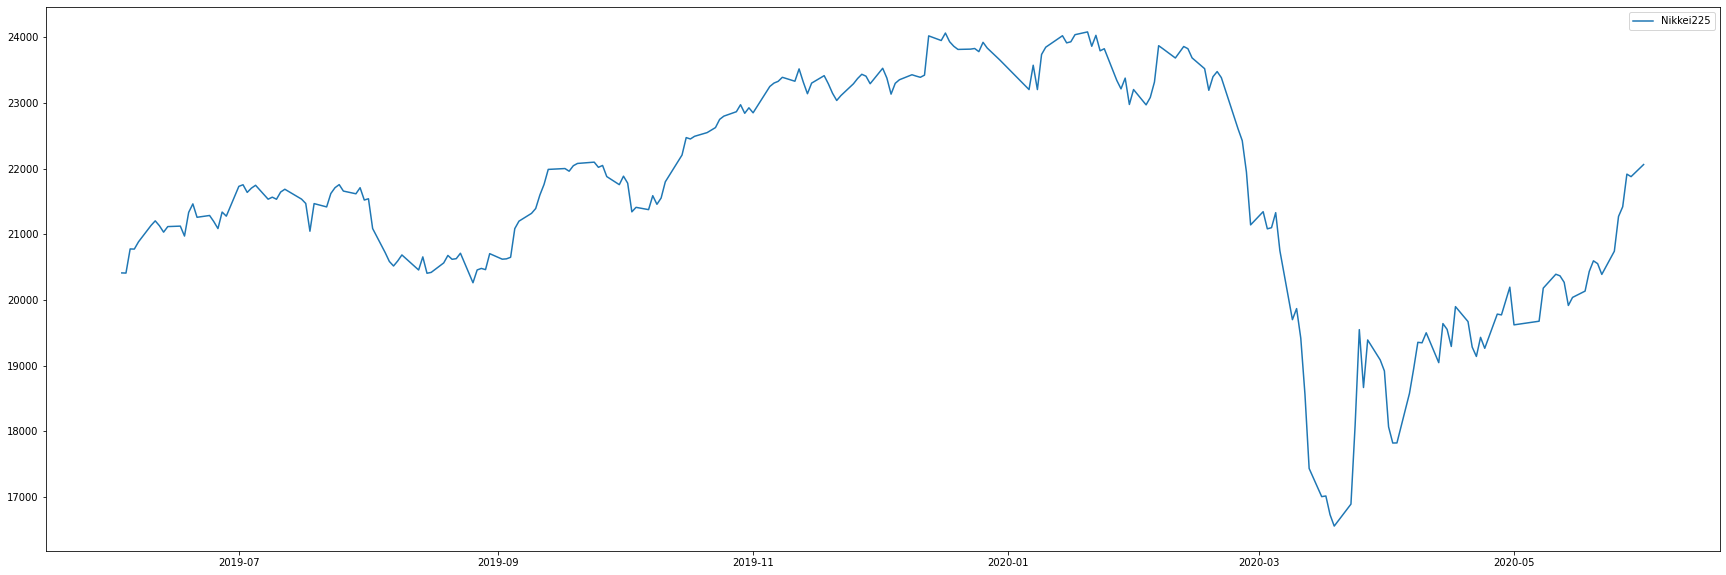

In [18]:
plt.figure(figsize=(30,10))
plt.plot(date,price, label='Nikkei225')
plt.legend()

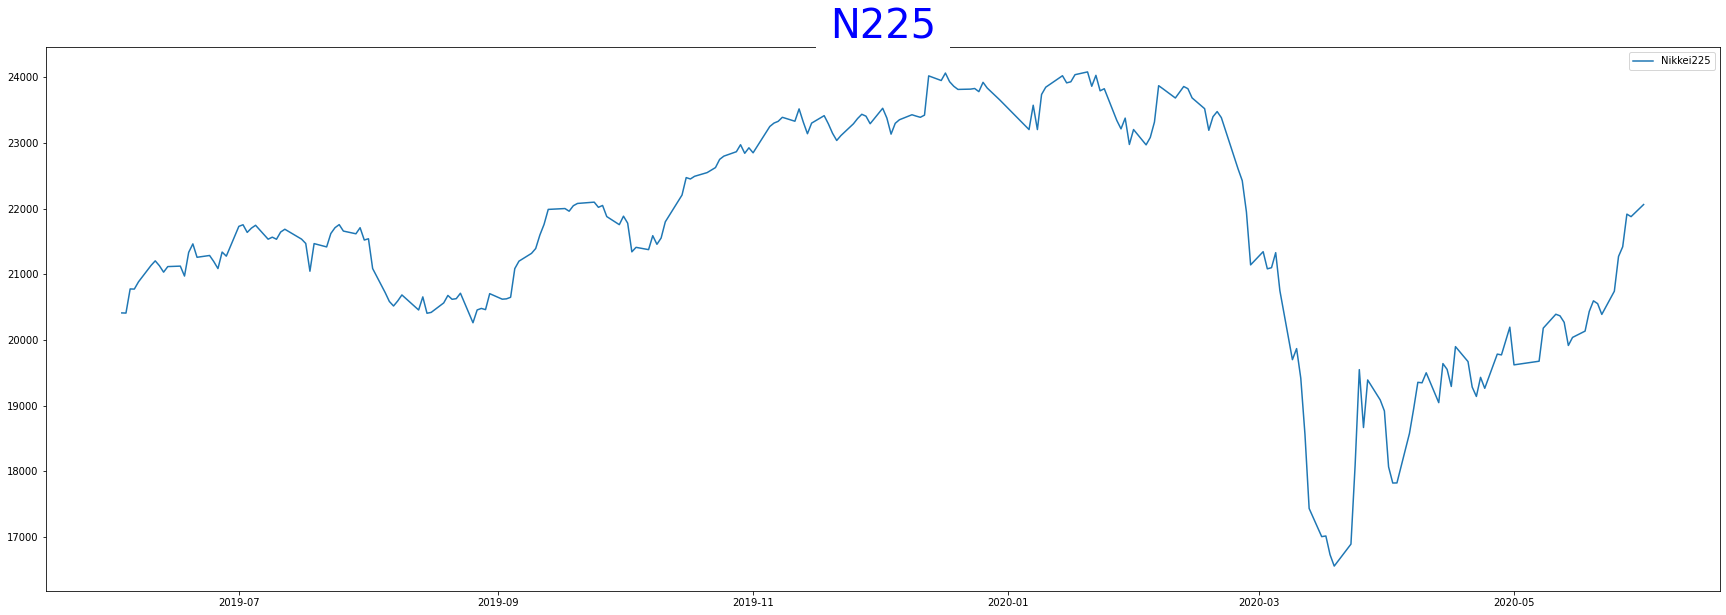

In [19]:
#グラフのタイトル付け
plt.figure(figsize=(30,10))
plt.plot(date,price, label='Nikkei225')
plt.title('N225', color='blue',backgroundcolor='white', size=40, loc='center')
plt.legend()

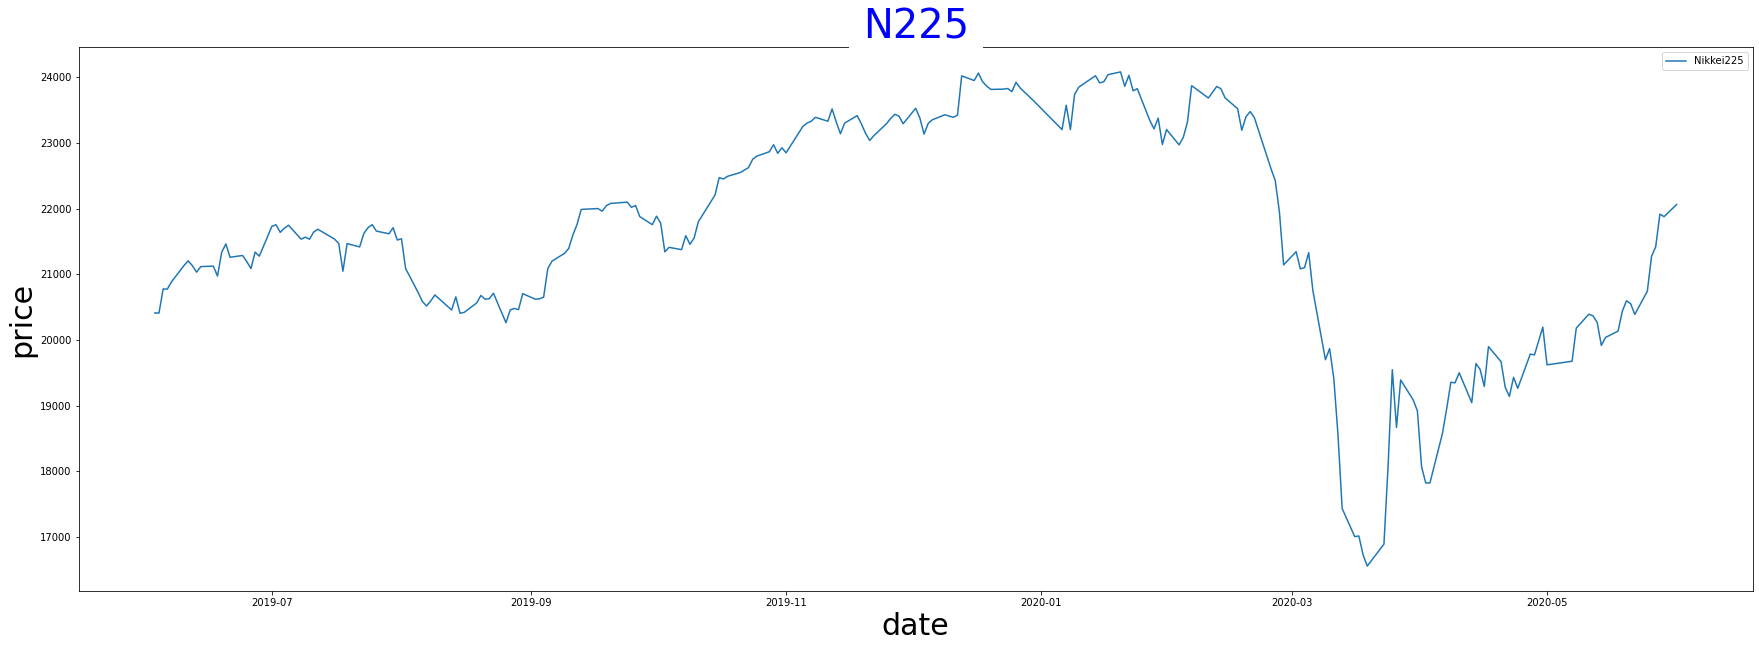

In [20]:
# X軸Y軸にタイトル付け
plt.figure(figsize=(30,10))
plt.plot(date,price, label='Nikkei225')
plt.title('N225', color='blue',backgroundcolor='white', size=40, loc='center')
plt.xlabel('date', color='black', size=30)
plt.ylabel('price', color='black', size=30)
plt.legend()

In [21]:
span01 = 5
span02 = 25
span03 = 50

# 移動平均の算出 rolling method
# DataFrameにカラムの追加
#  mean() 平均算出　max() 最大値の算出　min() 最小値の算出
df['sma01'] = price.rolling(window=span01).mean()
df['sma02'] = price.rolling(window=span02).mean()
df['sma03'] = price.rolling(window=span03).mean()

In [22]:
# pd.set_option('display.max_rows', None)
df.head(100)

,High,Low,Open,Close,Volume,Adj Close,sma01,sma02,sma03
Date,,,,,,,,,
2019-06-03,20438.029297,20305.740234,20327.869141,20410.880859,67400,20410.880859,NaN,NaN,NaN
2019-06-04,20464.570312,20289.640625,20435.859375,20408.539062,69200,20408.539062,NaN,NaN,NaN
2019-06-05,20800.640625,20646.150391,20667.890625,20776.099609,72300,20776.099609,NaN,NaN,NaN
2019-06-06,20842.279297,20745.839844,20745.839844,20774.039062,59600,20774.039062,NaN,NaN,NaN
2019-06-07,20907.769531,20816.580078,20859.779297,20884.710938,50700,20884.710938,20650.853906,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2019-10-21,22581.279297,22515.730469,22541.220703,22548.900391,48400,22548.900391,22434.714062,21919.802344,21315.456172
2019-10-23,22648.810547,22457.890625,22619.769531,22625.380859,68000,22625.380859,22518.348047,21954.433203,21357.632578
2019-10-24,22780.990234,22704.330078,22725.439453,22750.599609,61300,22750.599609,22573.883984,21984.925625,21400.777578


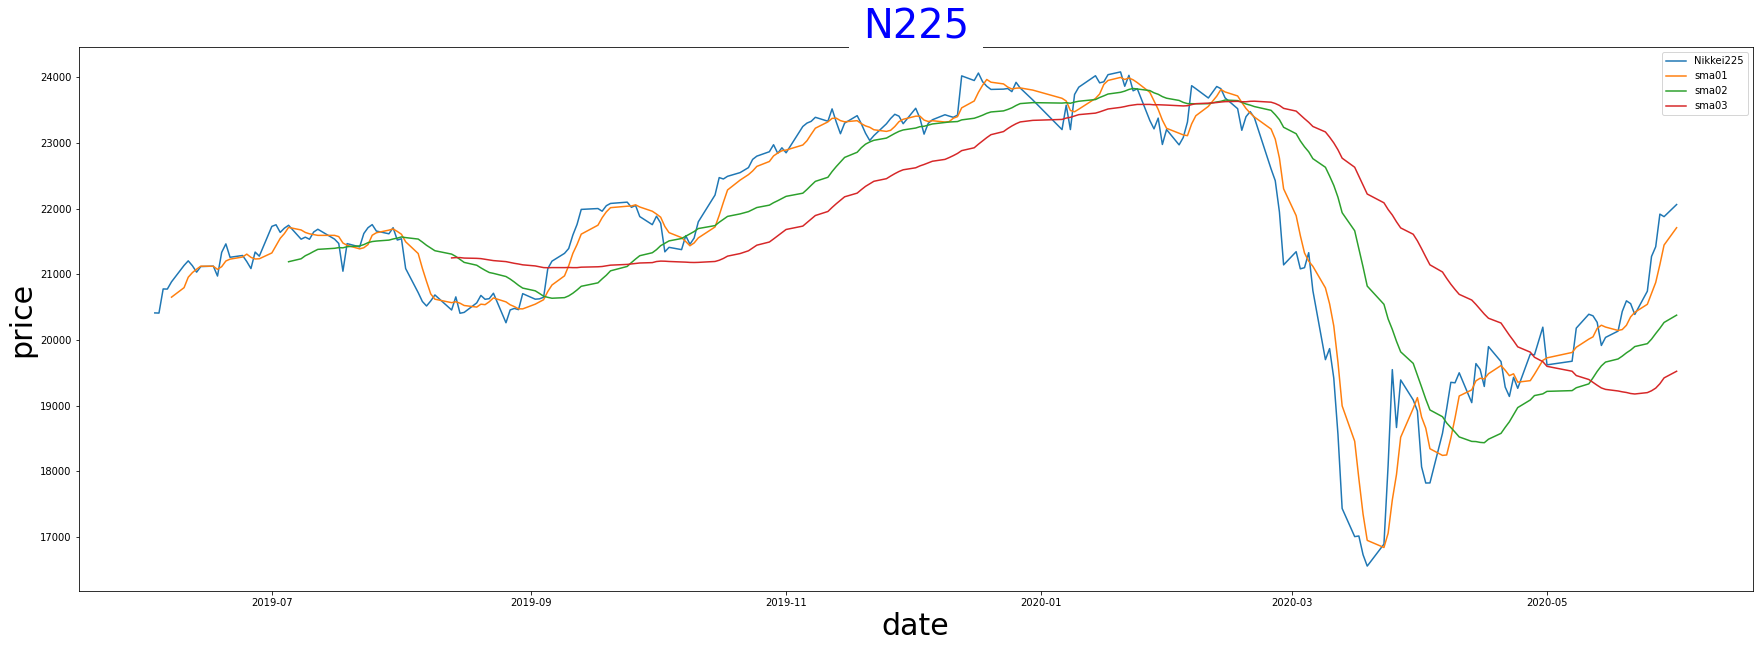

In [24]:
plt.figure(figsize=(30,10))
plt.plot(date,price, label='Nikkei225')
plt.plot(date, df['sma01'], label='sma01')
plt.plot(date, df['sma02'], label='sma02')
plt.plot(date, df['sma03'], label='sma03')


plt.title('N225', color='blue',backgroundcolor='white', size=40, loc='center')
plt.xlabel('date', color='black', size=30)
plt.ylabel('price', color='black', size=30)

plt.legend()

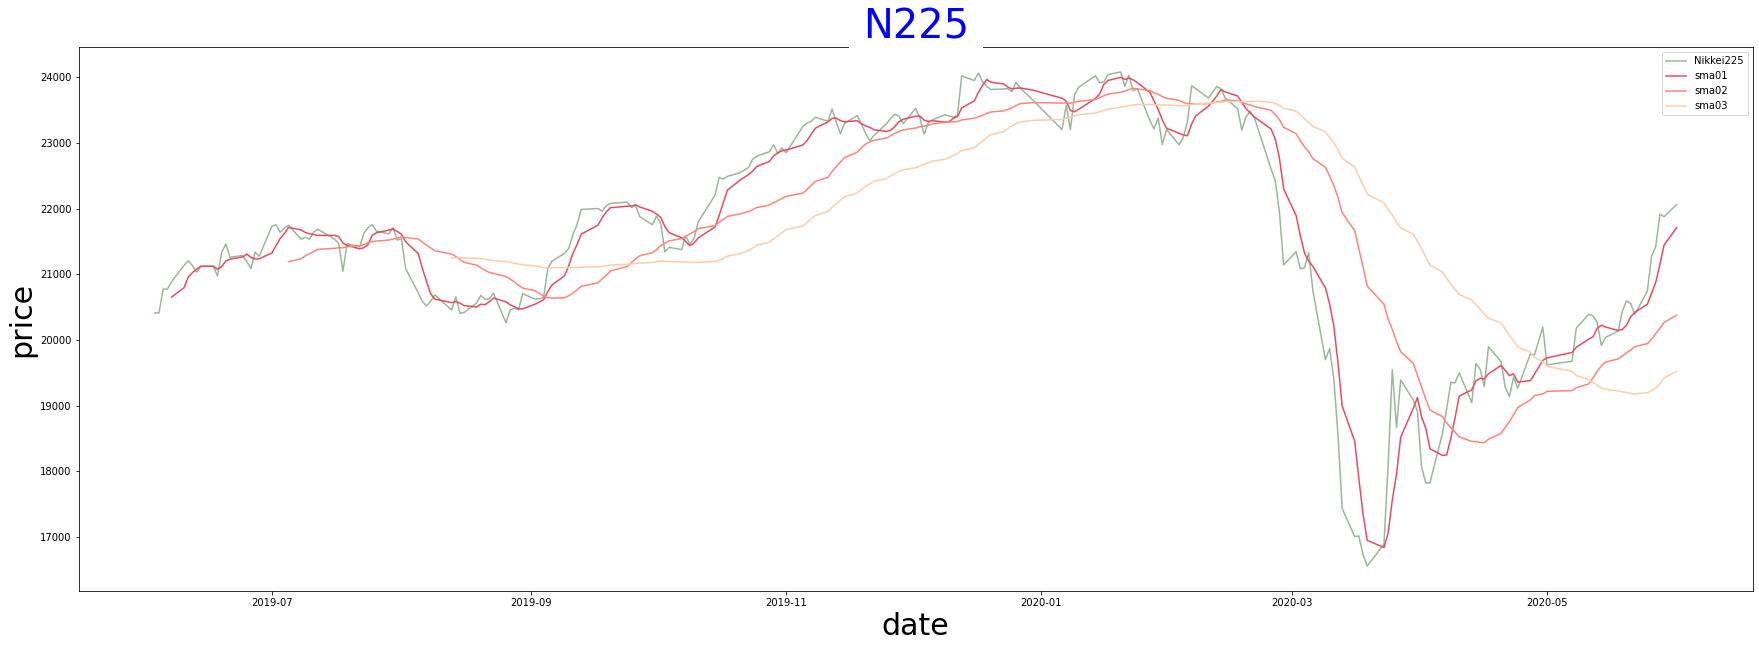

In [25]:
plt.figure(figsize=(30,10))

# 色分け
plt.plot(date,price, label='Nikkei225',color='#99b898')
plt.plot(date, df['sma01'], label='sma01', color='#e84a5f')
plt.plot(date, df['sma02'], label='sma02',color='#ff847c')
plt.plot(date, df['sma03'], label='sma03',color='#faceab')


plt.title('N225', color='blue',backgroundcolor='white', size=40, loc='center')
plt.xlabel('date', color='black', size=30)
plt.ylabel('price', color='black', size=30)

plt.legend()

In [28]:
#ゴールデンクロス 短期の移動平均線が中期以上の
# 移動平均線を「下から上に」抜けること- 価格が上昇

# デッドクロス 短期の移動平均線が中期以上の
# 移動平均線を「上から下に」抜けること- 価格が下降

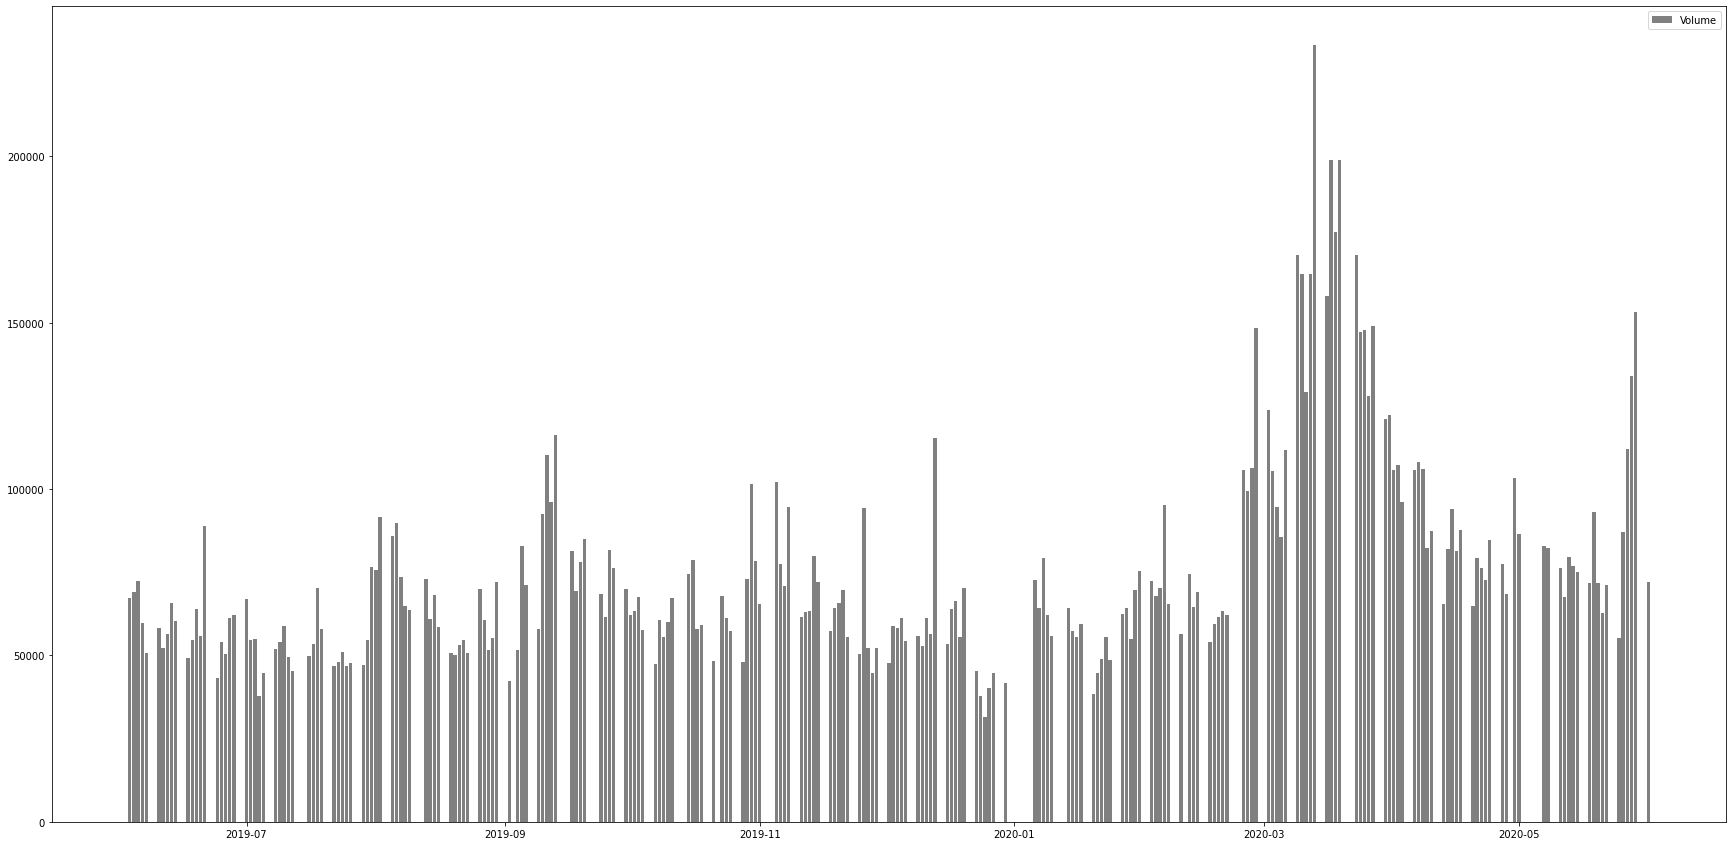

In [30]:
# 棒グラフ作成 - plot→bar
plt.figure(figsize=(30,15))
plt.bar(date, df['Volume'], label='Volume', color='grey')

plt.legend()

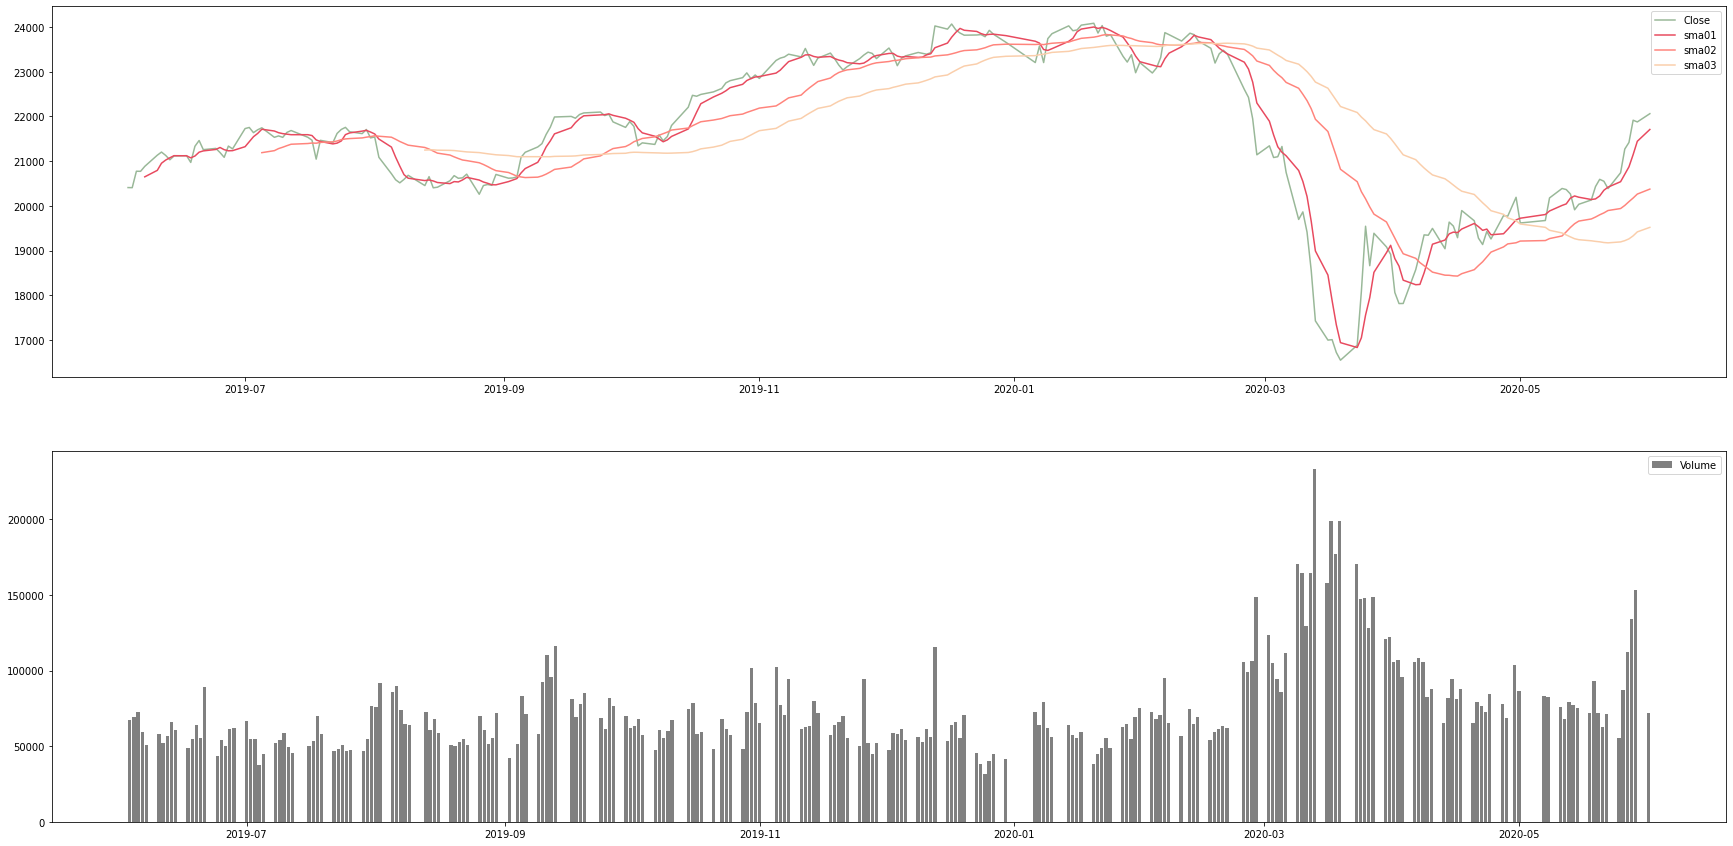

In [32]:
# plotとbarを両方表示　
# subplot(縦, 横, index) 縦2列, 横1列
plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,price, label='Close',color='#99b898')
plt.plot(date, df['sma01'], label='sma01', color='#e84a5f')
plt.plot(date, df['sma02'], label='sma02',color='#ff847c')
plt.plot(date, df['sma03'], label='sma03',color='#faceab')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date, df['Volume'], label='Volume', color='grey')
plt.legend()

In [33]:
# https://www.jpx.co.jp/ 東証URL

In [34]:
# リクルートホールディングス
# data.DataReader(証券コード, データソースサイトstooq.com)
df = data.DataReader('6098.JP', 'stooq')

In [35]:
# 直近5日分
df.head()

,Open,High,Low,Close,Volume
Date,,,,,
2020-07-09,3635.0,3661.0,3622.0,3622.0,3453500
2020-07-08,3651.0,3658.0,3601.0,3630.0,3982900
2020-07-07,3611.0,3693.0,3606.0,3643.0,3891400
2020-07-06,3623.0,3664.0,3597.0,3645.0,3320300
2020-07-03,3662.0,3665.0,3587.0,3642.0,1895800


In [36]:
df.index.min()

Timestamp('2015-07-13 00:00:00')

In [37]:
df.index.max()

Timestamp('2020-07-09 00:00:00')

In [38]:
# 過去一番下から5日分
df.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2015-07-17,1236.60,1256.26,1234.97,1254.62,4073852
2015-07-16,1233.32,1239.88,1216.95,1236.60,4092473
2015-07-15,1198.93,1210.40,1189.11,1203.84,3343033
2015-07-14,1197.29,1198.93,1180.91,1185.83,3158342
2015-07-13,1176.01,1187.46,1174.36,1179.27,3088434


In [39]:
df = df.sort_index()

In [43]:
# 2019年6月1日以上のデータ抽出
df[df.index>='2019-06-01 00:00:00']

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-03,3412.41,3463.92,3394.58,3463.92,3484466
2019-06-04,3456.00,3456.00,3259.86,3263.82,7004164
2019-06-05,3320.28,3393.58,3309.39,3393.58,5062595
2019-06-06,3364.87,3381.70,3330.20,3339.11,4983547
2019-06-07,3371.79,3381.70,3318.30,3342.08,2580413
...,...,...,...,...,...
2020-07-03,3662.00,3665.00,3587.00,3642.00,1895800
2020-07-06,3623.00,3664.00,3597.00,3645.00,3320300
2020-07-07,3611.00,3693.00,3606.00,3643.00,3891400


In [44]:
#  2020年5月1日以下のデータ抽出
df[df.index<='2020-05-01 00:00:00']

,Open,High,Low,Close,Volume
Date,,,,,
2015-07-13,1176.01,1187.46,1174.36,1179.27,3088434
2015-07-14,1197.29,1198.93,1180.91,1185.83,3158342
2015-07-15,1198.93,1210.40,1189.11,1203.84,3343033
2015-07-16,1233.32,1239.88,1216.95,1236.60,4092473
2015-07-17,1236.60,1256.26,1234.97,1254.62,4073852
...,...,...,...,...,...
2020-04-24,2730.00,2765.00,2700.50,2764.00,5509400
2020-04-27,2810.00,2950.00,2787.50,2937.50,7598200
2020-04-28,2990.00,2997.50,2897.50,2952.00,5592300


In [48]:
# 過去2019年6月1日から2020年5月1日までのデータ抽出
df[(df.index>='2019-06-01 00:00:00' )& (df.index<='2020-05-01 00:00:00')]

,Open,High,Low,Close,Volume
Date,,,,,
2019-06-03,3412.41,3463.92,3394.58,3463.92,3484466
2019-06-04,3456.00,3456.00,3259.86,3263.82,7004164
2019-06-05,3320.28,3393.58,3309.39,3393.58,5062595
2019-06-06,3364.87,3381.70,3330.20,3339.11,4983547
2019-06-07,3371.79,3381.70,3318.30,3342.08,2580413
...,...,...,...,...,...
2020-04-24,2730.00,2765.00,2700.50,2764.00,5509400
2020-04-27,2810.00,2950.00,2787.50,2937.50,7598200
2020-04-28,2990.00,2997.50,2897.50,2952.00,5592300


In [49]:
# リクルートホールディングスの株データを
# プロットと棒グラフで表現

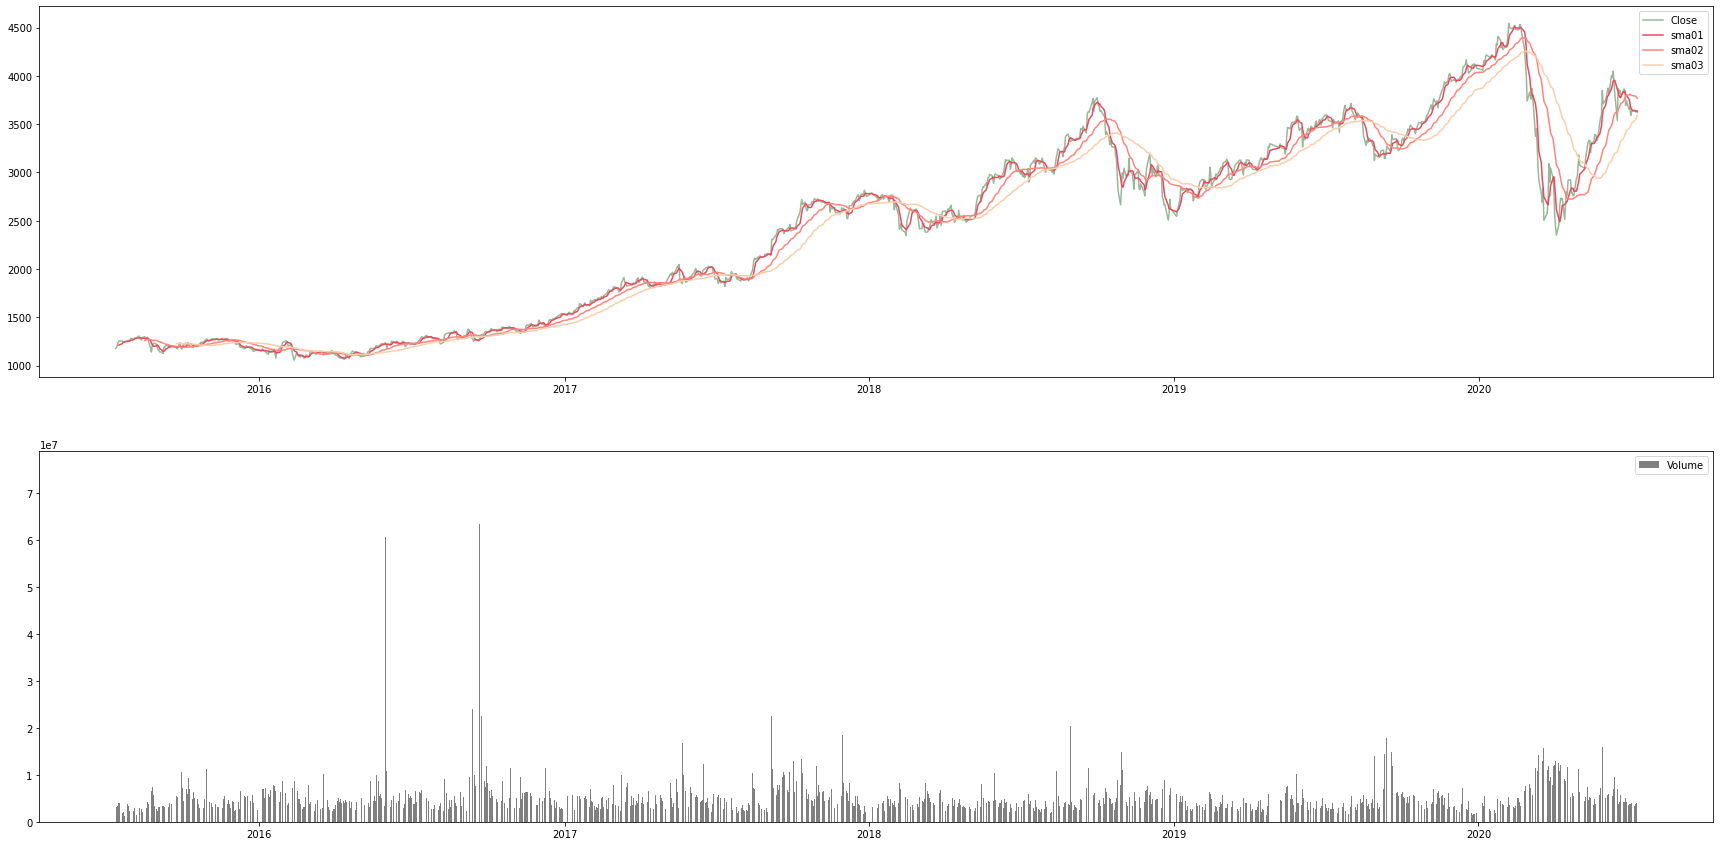

In [51]:
date = df.index
price = df['Close']

span01 = 5
span02 = 25
span03 = 50

#  mean() 平均算出　max() 最大値の算出　min() 最小値の算出
df['sma01'] = price.rolling(window=span01).mean()
df['sma02'] = price.rolling(window=span02).mean()
df['sma03'] = price.rolling(window=span03).mean()

plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,price, label='Close',color='#99b898')
plt.plot(date, df['sma01'], label='sma01', color='#e84a5f')
plt.plot(date, df['sma02'], label='sma02',color='#ff847c')
plt.plot(date, df['sma03'], label='sma03',color='#faceab')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date, df['Volume'], label='Volume', color='grey')
plt.legend()

In [52]:
# 次にユニクロGUのふぁーすとファーストリテイリング

In [53]:
start = '2019-06-01'
end = '2020-07-01'
company_code = '6502.JP'

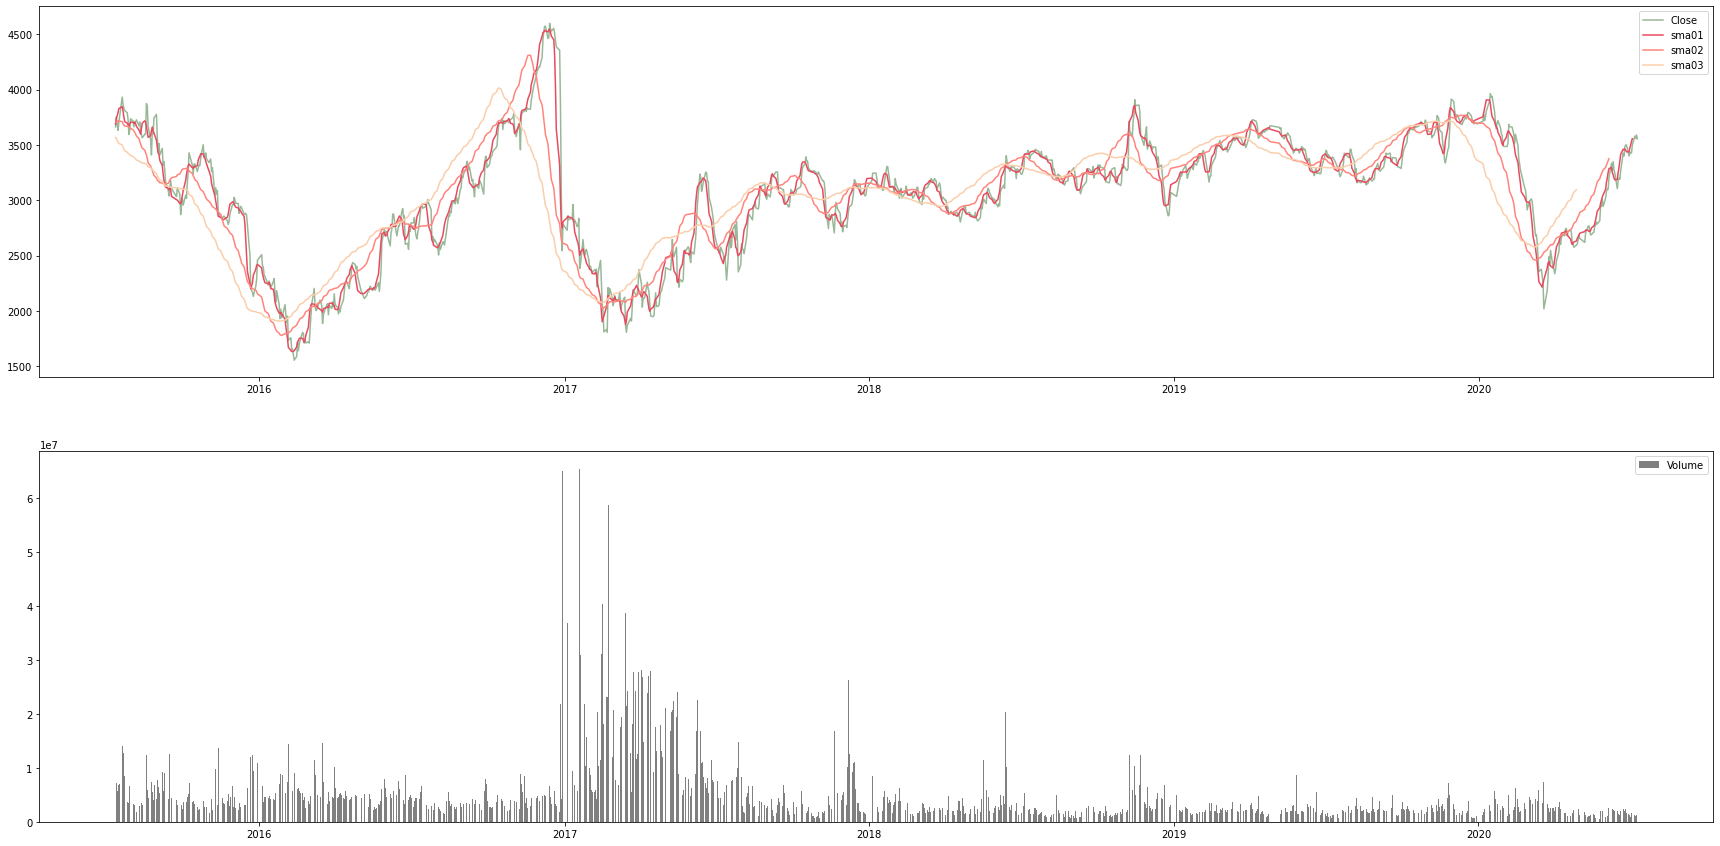

In [54]:
df[(df.index>=start ) & (df.index<=end)]
df = data.DataReader(company_code, 'stooq')

date = df.index
price = df['Close']

span01 = 5
span02 = 25
span03 = 50

#  mean() 平均算出　max() 最大値の算出　min() 最小値の算出
df['sma01'] = price.rolling(window=span01).mean()
df['sma02'] = price.rolling(window=span02).mean()
df['sma03'] = price.rolling(window=span03).mean()

plt.figure(figsize=(30,15))
plt.subplot(2,1,1)

plt.plot(date,price, label='Close',color='#99b898')
plt.plot(date, df['sma01'], label='sma01', color='#e84a5f')
plt.plot(date, df['sma02'], label='sma02',color='#ff847c')
plt.plot(date, df['sma03'], label='sma03',color='#faceab')
plt.legend()

plt.subplot(2,1,2)
plt.bar(date, df['Volume'], label='Volume', color='grey')
plt.legend()

In [55]:
# 共通部分を関数化

In [56]:
def company_stock(start, end, company_code):
    df = data.DataReader(company_code, 'stooq')
    df = df[(df.index>=start) & (df.index<=end)]
    
    date = df.index
    price = df['Close']

    span01 = 5
    span02 = 25
    span03 = 50

    #  mean() 平均算出　max() 最大値の算出　min() 最小値の算出
    df['sma01'] = price.rolling(window=span01).mean()
    df['sma02'] = price.rolling(window=span02).mean()
    df['sma03'] = price.rolling(window=span03).mean()

    plt.figure(figsize=(20,10))
    plt.subplot(2,1,1)

    plt.plot(date,price, label='Close',color='#99b898')
    plt.plot(date, df['sma01'], label='sma01', color='#e84a5f')
    plt.plot(date, df['sma02'], label='sma02',color='#ff847c')
    plt.plot(date, df['sma03'], label='sma03',color='#faceab')
    plt.legend()

    plt.subplot(2,1,2)
    plt.bar(date, df['Volume'], label='Volume', color='grey')
    plt.legend()

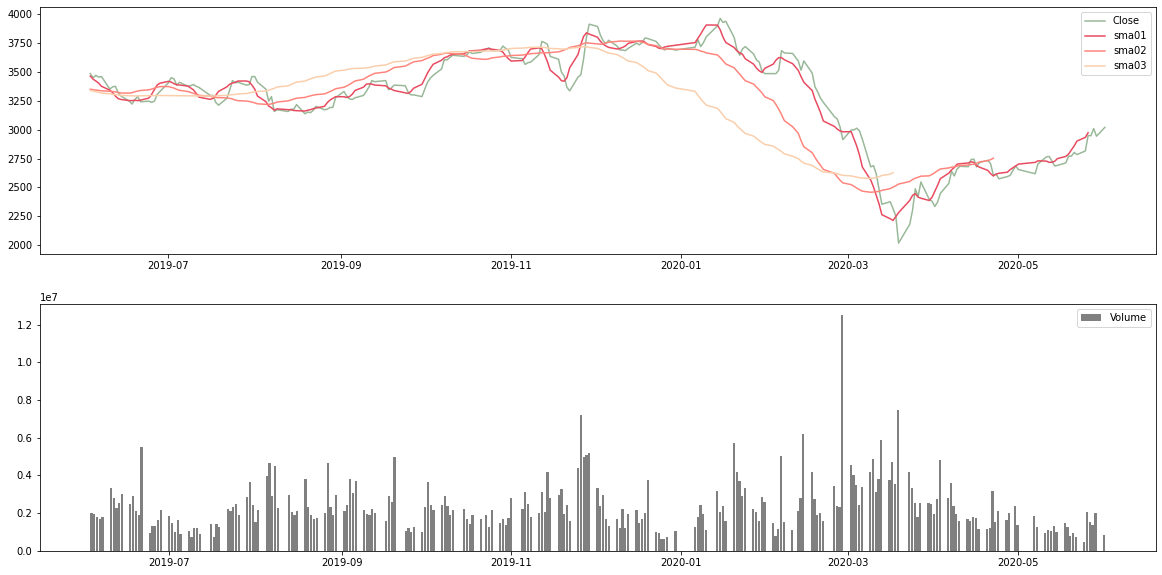

In [57]:
company_stock('2019-06-01', '2020-06-01', '6502.JP') # リクルート

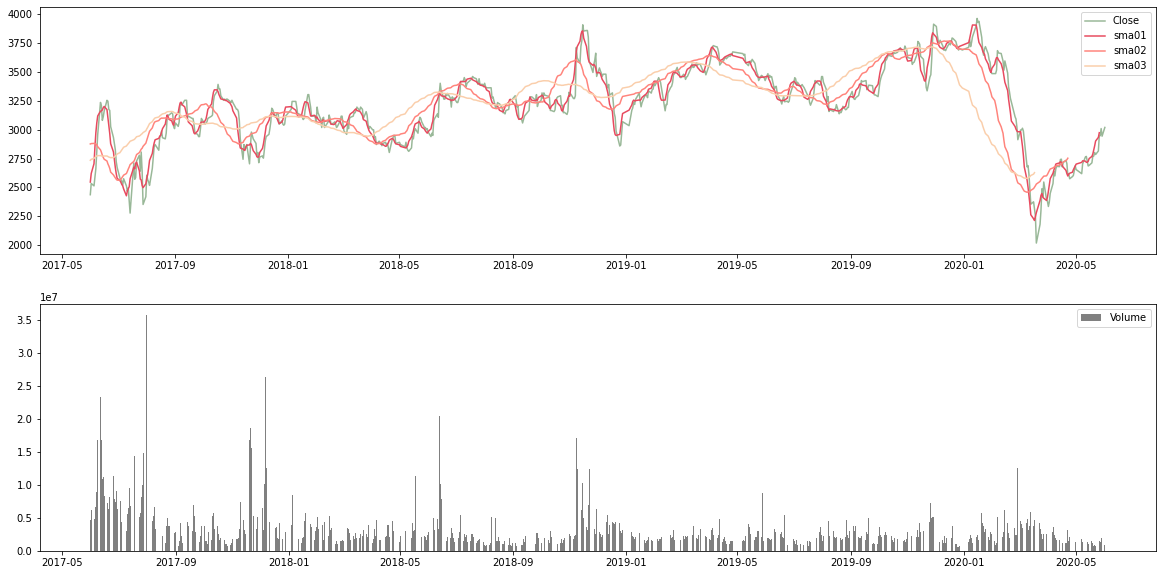

In [58]:
company_stock('2017-06-01','2020-06-01','6502.JP')

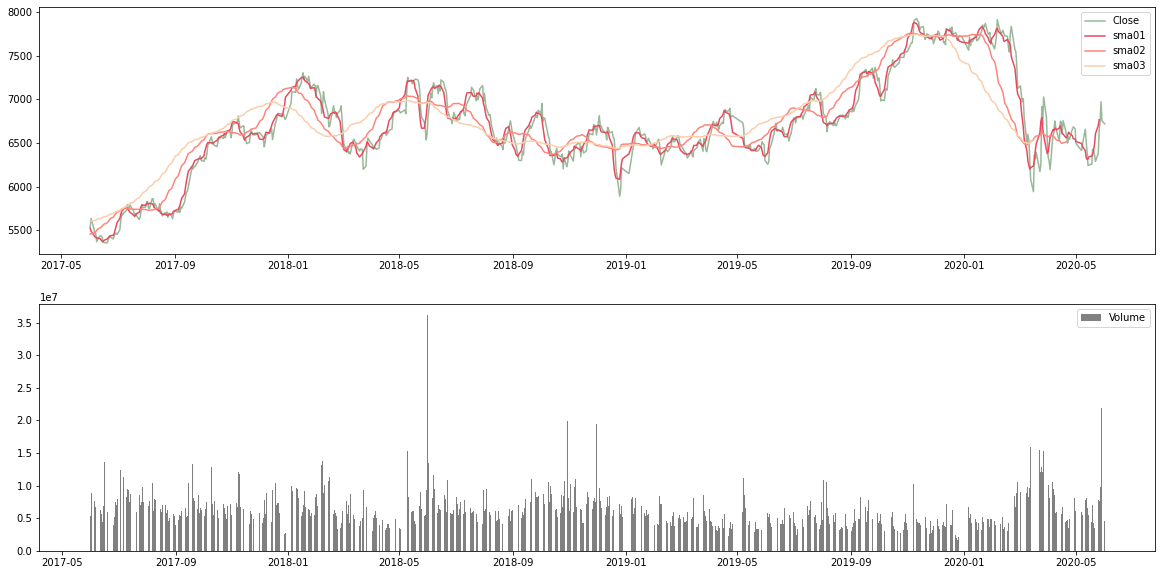

In [59]:
company_stock('2017-06-01','2020-06-01','7203.JP') # トヨタ自動車